# Image Processing - Morphology
in this notebook, some morphological operations will be performed. First, the image itself and some general information is shown. The map is a binary land cover map, showing sealed surfaces in West Africa (Nigeria, Benin and Togo).

In [1]:
import scipy.ndimage
import rasterio
import skimage.morphology
from matplotlib import pyplot as plt
import matplotlib

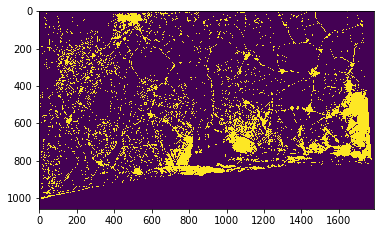

In [3]:
# Read image and raster
src = rasterio.open("binary_land_classification_final.tif")
array = src.read(1)

plt.imshow(array)

In [4]:
print("GENERAL INFO:")
print("TIF CRS:\t\t",src.crs)
print("Array shape:\t\t",array.shape)
print("Array No. of pixels:\t", array.size)
print("Image data type:\t",array.dtype)
print("Max value of raster:\t",array.max())
print("Min value of raster:\t",array.min())

GENERAL INFO:
TIF CRS:		 EPSG:4326
Array shape:		 (1057, 1789)
Array No. of pixels:	 1890973
Image data type:	 int16
Max value of raster:	 1
Min value of raster:	 0


# Image Morphology

In [5]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk
import numpy as np

In [6]:
# define comparison pot (source:https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py)
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 15), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

## Skeleton
The skeleton reduces each area to a single pixel wide line along its center.

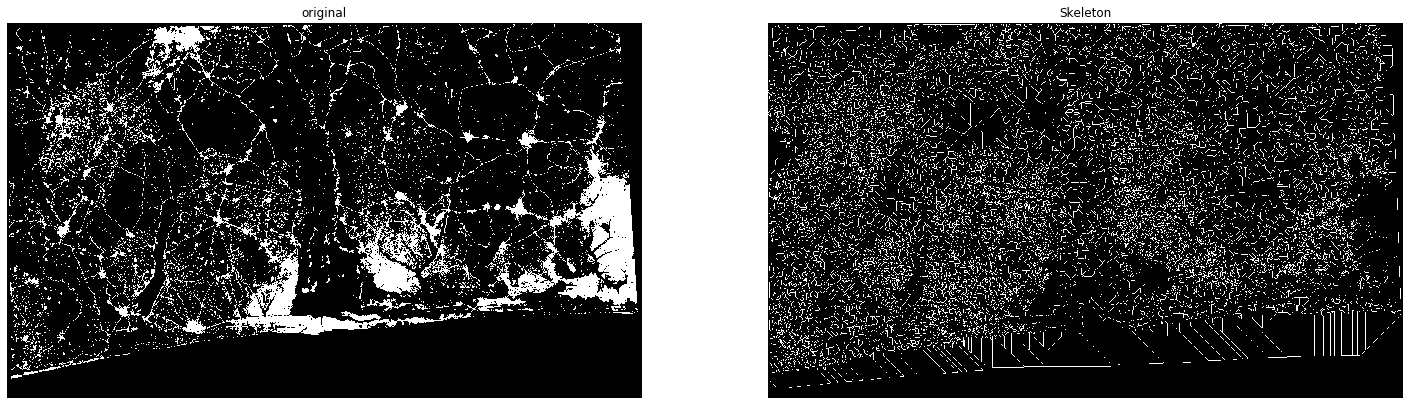

In [7]:
sk = skeletonize(array == 0)
plot_comparison(array, sk, 'Skeleton')

## Hull
This function spans a mask around the total area covered by the pixels.

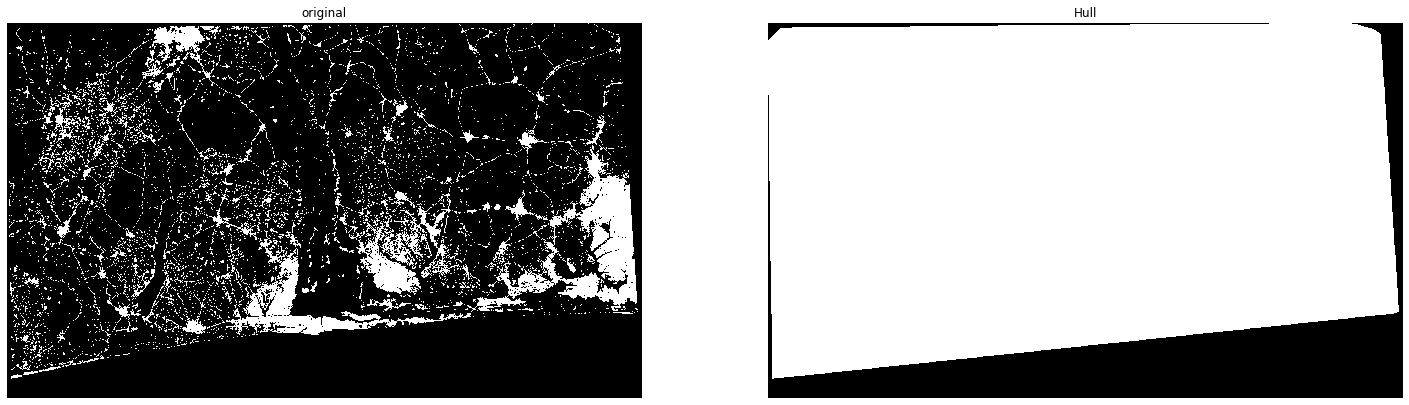

In [11]:
hull = convex_hull_image(array == 1)
plot_comparison(array, hull, 'Hull')